# Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

# Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:
```
Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (numeric, in DM - Deutsch Mark)
Credit amount (numeric, in DM)
Duration (numeric, in month)
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
```
# Acknowledgements
- Source: UCI
- Kaggle: https://www.kaggle.com/uciml/german-credit#german_credit_data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
%matplotlib inline
# plt.rcParams['figure.figsize'] = [25, 10]

In [3]:
df = pd.read_csv("./german_credit_data_with_risk.csv")
df.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# Análisis exploratorio de los datos

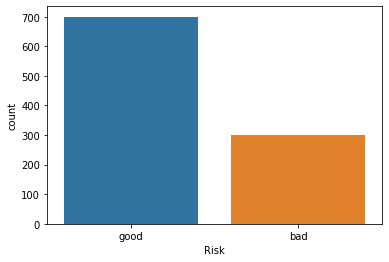

In [5]:
sns.countplot(x='Risk', data=df)

Creating an categorical variable to handle with the Age variable

In [6]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)


df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

## Valores nulos

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
total

Checking account    394
Saving accounts     183
Age_cat               0
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
Unnamed: 0            0
dtype: int64

In [8]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,67,male,2,own,no_inf,little,1169,6,radio/TV,good,Senior
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,2,49,male,1,own,little,no_inf,2096,12,education,good,Adult
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult
5,5,35,male,1,free,no_inf,no_inf,9055,36,education,good,Young
6,6,53,male,2,own,quite rich,no_inf,2835,24,furniture/equipment,good,Adult
7,7,35,male,3,rent,little,moderate,6948,36,car,good,Young
8,8,61,male,1,own,rich,no_inf,3059,12,radio/TV,good,Senior
9,9,28,male,3,own,little,moderate,5234,30,car,bad,Young


# Valores categóricos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
Age_cat             1000 non-null category
dtypes: category(1), int64(5), object(6)
memory usage: 87.2+ KB


In [10]:
print("Sex : ", df.Sex.unique())
print("Housing : ", df.Housing.unique())
print("Saving accounts : ", df['Saving accounts'].unique())
print("Checking account : ", df['Checking account'].unique())
print("Purpose : ", df.Purpose.unique())
print("Risk : ", df['Risk'].unique())
print("Aget_cat : ", df['Age_cat'].unique())

Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['no_inf' 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' 'no_inf' 'rich']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk :  ['good' 'bad']
Aget_cat :  [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


In [12]:
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Housing'] = LabelEncoder().fit_transform(df['Housing'])
df['Saving accounts'] = LabelEncoder().fit_transform(df['Saving accounts'])
df['Checking account'] = LabelEncoder().fit_transform(df['Checking account'])
df['Purpose'] = LabelEncoder().fit_transform(df['Purpose'])
df['Risk'] = LabelEncoder().fit_transform(df['Risk'])
df['Age_cat'] = LabelEncoder().fit_transform(df['Age_cat'])
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,67,1,2,1,2,0,1169,6,5,1,1
1,1,22,0,2,1,0,1,5951,48,5,0,2
2,2,49,1,1,1,0,2,2096,12,3,1,0
3,3,45,1,2,0,0,0,7882,42,4,1,0
4,4,53,1,2,0,0,0,4870,24,1,0,0


In [13]:
 # Selección de variables
df = df.drop(['Unnamed: 0', 'Age'], 1,)